In [1]:
!pip install pandas
!pip install numpy

In [9]:
from google.colab import files
uploaded=files.upload()

Saving Sales_Dataset.csv to Sales_Dataset.csv


In [10]:
import pandas as pd

In [16]:
df = pd.read_csv('Sales_Dataset.csv')

In [17]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [18]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [19]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


**DATA** **WRANGLING**

#Inspecting data to find the missing values

In [20]:
df.isna().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [21]:
df.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


#Application of Groupby() function for Data chunking and merging.

In [22]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [ ]:
# Data Chunking = using groupby() function to break down the data into segments for better analysis

In [23]:
# Aggregating the sales data by state, Group, Unit to compute sums,averages or count
df.groupby("State")["Sales"].sum()

,Sales
State,
NSW,74970000
NT,22580000
QLD,33417500
SA,58857500
TAS,22760000
VIC,105565000
WA,22152500


In [24]:
df.groupby("Group")["Sales"].sum()

,Sales
Group,
Kids,85072500
Men,85750000
Seniors,84037500
Women,85442500


In [25]:
df.groupby("Unit")["Sales"].sum()

,Sales
Unit,
2,650000
3,1800000
4,2100000
5,4137500
6,5550000
...,...
61,1372500
62,1550000
63,2047500


In [26]:
# Analysing the Date and time for periodic statistic
df.groupby("Date")["Sales"].sum()

,Sales
Date,
1-Dec-2020,4465000
1-Nov-2020,3020000
1-Oct-2020,3720000
10-Dec-2020,4717500
10-Nov-2020,2992500
...,...
8-Nov-2020,3210000
8-Oct-2020,3945000
9-Dec-2020,4655000


In [27]:
df.groupby("Time")["Sales"].sum()

,Sales
Time,
Afternoon,114007500
Evening,112087500
Morning,114207500


In [ ]:
# Data Merging = Merge summary of the data to the original dataset after aggregating or splitting.

In [ ]:
# Compute total sales by Unit

In [28]:
total_sales = df.groupby('Unit')['Sales'].sum().reset_index()
total_sales.rename(columns={'Sales': 'Total Sales by Unit'}, inplace=True)
df_merged = pd.merge(df, total_sales, on='Unit', how='left')
print(df_merged)

             Date        Time State     Group  Unit  Sales  \
0      1-Oct-2020     Morning    WA      Kids     8  20000   
1      1-Oct-2020     Morning    WA       Men     8  20000   
2      1-Oct-2020     Morning    WA     Women     4  10000   
3      1-Oct-2020     Morning    WA   Seniors    15  37500   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500   
...           ...         ...   ...       ...   ...    ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500   
7557  30-Dec-2020     Evening   TAS       Men    15  37500   
7558  30-Dec-2020     Evening   TAS     Women    11  27500   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500   

      Total Sales by Unit  
0                 7380000  
1                 7380000  
2                 2100000  
3                12600000  
4                 1800000  
...                   ...  
7555             10640000  
7556             12600000  
755

In [ ]:
# Total Sales by date

In [29]:
total_sales = df.groupby('Date')['Sales'].sum().reset_index()
total_sales.rename(columns = {'Sales': 'TotalSales by date'}, inplace=True)
df_merged = pd.merge(df, total_sales, on='Date',how='right')
df_merged = pd.merge(df, total_sales, on='Date',how='left')
print(df_merged)


             Date        Time State     Group  Unit  Sales  TotalSales by date
0      1-Oct-2020     Morning    WA      Kids     8  20000             3720000
1      1-Oct-2020     Morning    WA       Men     8  20000             3720000
2      1-Oct-2020     Morning    WA     Women     4  10000             3720000
3      1-Oct-2020     Morning    WA   Seniors    15  37500             3720000
4      1-Oct-2020   Afternoon    WA      Kids     3   7500             3720000
...           ...         ...   ...       ...   ...    ...                 ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000             4590000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500             4590000
7557  30-Dec-2020     Evening   TAS       Men    15  37500             4590000
7558  30-Dec-2020     Evening   TAS     Women    11  27500             4590000
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500             4590000

[7560 rows x 7 columns]


In [ ]:
# Total Sales by Group

In [30]:
total_sales = df.groupby('Group')['Sales'].sum().reset_index()
total_sales.rename(columns = {'Sales':'TotalSales by group'}, inplace=True)
df_merged = pd.merge(df, total_sales, on='Group', how='right')
print(df_merged)


             Date        Time State   Group  Unit   Sales  TotalSales by group
0      1-Oct-2020     Morning    WA    Kids     8   20000             85072500
1      1-Oct-2020   Afternoon    WA    Kids     3    7500             85072500
2      1-Oct-2020     Evening    WA    Kids    15   37500             85072500
3      1-Oct-2020     Morning    NT    Kids    13   32500             85072500
4      1-Oct-2020   Afternoon    NT    Kids    13   32500             85072500
...           ...         ...   ...     ...   ...     ...                  ...
7555  30-Dec-2020   Afternoon   NSW   Women    42  105000             85442500
7556  30-Dec-2020     Evening   NSW   Women    37   92500             85442500
7557  30-Dec-2020     Morning   TAS   Women    14   35000             85442500
7558  30-Dec-2020   Afternoon   TAS   Women    10   25000             85442500
7559  30-Dec-2020     Evening   TAS   Women    11   27500             85442500

[7560 rows x 7 columns]


In [ ]:
As a final insight Data chunking is used for exploratory analysis while Data merging is used for a comprehensive view to analysis both merged and individual data.
I would recommend using Groupby function for both data chunking and merging

DATA ANALYSIS


# Statistical analysis on the data in Sales and Units column. Utilizing techniques such as mean, median, mode and standard deviation.





In [35]:
df = pd.read_csv('Sales_Dataset.csv')

In [ ]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [ ]:
# Computing descriptive statistics for sales column
# MEAN
df["Sales"].mean()

45013.5582010582

In [ ]:
#MEDIAN
df["Sales"].median()

35000.0

In [ ]:
# MODE
df["Sales"].mode()[0]

22500

In [ ]:
# STANDARD DEVIATION
df["Sales"].std()

32253.506943966317

In [ ]:
# Statistics for Units column
# MEAN
df["Unit"].mean()

18.00542328042328

In [ ]:
  # MEDIAN
  df["Unit"].median()

14.0

In [ ]:
# MODE
df["Unit"].mode()[0]

9

In [ ]:
# STANDARD DEVIATION
df["Unit"].std()

12.901402777586458

The Group with highest and lowest sales

In [ ]:
# To identify the group with highest and lowest sales
# aggregate the sales by group column
 # Aggregate total sales by group
group_sales = df.groupby('Group')['Sales'].sum()

In [ ]:
# Identify the group with highest sales
highest_sales_group = group_sales.idxmax()
highest_sales_value = group_sales.max()

# Identity the group with lowest sales
lowest_sales_group = group_sales.idxmin()
lowest_sales_value = group_sales.min()

print("Group with the highest sales:", highest_sales_group,"with total sales of",highest_sales_value)
print("Group with lowest sales:", lowest_sales_group,"with total sales of",lowest_sales_value)

Group with the highest sales:  Men with total sales of 85750000
Group with lowest sales:  Seniors with total sales of 84037500


Presenting the results of the above analysis by generating weekly,monthly and quarterly reports.

In [ ]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [ ]:
# Before starting the report we should convert the date column with date and time format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Set date column as index for resampling
df.set_index('Date', inplace=True)


In [ ]:
# Weekly Report of sales and units per week
weekly_report = df.resample('W').agg({
    'Sales': ['sum', 'mean', 'median', 'std'],
    'Unit': ['sum', 'mean', 'median', 'std']
}).reset_index()
print("weekly_report:")
print(weekly_report.head())
print(weekly_report.tail())

weekly_report:
        Date     Sales                                        Unit             \
                   sum          mean   median           std    sum       mean   
0 2020-10-04  15045000  44776.785714  35000.0  29293.076913   6018  17.910714   
1 2020-10-11  27002500  45922.619048  37500.0  29930.519460  10801  18.369048   
2 2020-10-18  26640000  45306.122449  35000.0  29928.788223  10656  18.122449   
3 2020-10-25  26815000  45603.741497  35000.0  29851.225988  10726  18.241497   
4 2020-11-01  21807500  43268.849206  32500.0  29887.407035   8723  17.307540   

                     
  median        std  
0   14.0  11.717231  
1   15.0  11.972208  
2   14.0  11.971515  
3   14.0  11.940490  
4   13.0  11.954963  
         Date     Sales                                        Unit  \
                    sum          mean   median           std    sum   
9  2020-12-06  29622500  50378.401361  37500.0  34589.575974  11849   
10 2020-12-13  31525000  53613.945578  37500.0  36

In [ ]:
# Finally we identify the short-term trends in sales and units sold. This is useful for tracking the performance of weekly promotions or events.

In [ ]:
# Monthly Report of sales and units per month
monthly_report = df.resample('ME').agg({
    'Sales': ['sum', 'mean', 'median', 'std'],
    'Unit': ['sum', 'mean', 'median', 'std']
}).reset_index()
print("\nMonthly Report:")
print(monthly_report.head())
print(monthly_report.tail())


Monthly Report:
        Date      Sales                                        Unit  \
                    sum          mean   median           std    sum   
0 2020-10-31  114290000  45353.174603  35000.0  29861.302213  45716   
1 2020-11-30   90682500  35985.119048  25000.0  27366.175823  36273   
2 2020-12-31  135330000  53702.380952  37500.0  36385.451298  54132   

                                
        mean median        std  
0  18.141270   14.0  11.944521  
1  14.394048   10.0  10.946470  
2  21.480952   15.0  14.554181  
        Date      Sales                                        Unit  \
                    sum          mean   median           std    sum   
0 2020-10-31  114290000  45353.174603  35000.0  29861.302213  45716   
1 2020-11-30   90682500  35985.119048  25000.0  27366.175823  36273   
2 2020-12-31  135330000  53702.380952  37500.0  36385.451298  54132   

                                
        mean median        std  
0  18.141270   14.0  11.944521  
1  14.3

In [ ]:
# in this report we understand the overall monthly performance, in budgeting and resource allocation. It can also highlight seasonal trends or recurring patterns.

In [ ]:
# Quarterly Report of sales and units per quarter
quarterly_report = df.resample('QE').agg({
    'Sales': ['sum', 'mean', 'median', 'std'],
    'Unit': ['sum', 'mean', 'median', 'std']
}).reset_index()
print("\nQuarterly Report:")
print(quarterly_report.head())
print(quarterly_report.tail())


Quarterly Report:
        Date      Sales                                         Unit  \
                    sum          mean   median           std     sum   
0 2020-12-31  340302500  45013.558201  35000.0  32253.506944  136121   

                                
        mean median        std  
0  18.005423   14.0  12.901403  
        Date      Sales                                         Unit  \
                    sum          mean   median           std     sum   
0 2020-12-31  340302500  45013.558201  35000.0  32253.506944  136121   

                                
        mean median        std  
0  18.005423   14.0  12.901403  


In [ ]:
# In this report we analyse a broader view of performance trends over the business quarter. This can be crucial for strategic planning and assessing the impact of longer-term initiatives.

In [ ]:
weekly_report.to_csv("weekly_report.csv", index=False)
monthly_report.to_csv("monthly_report.csv", index=False)
quarterly_report.to_csv("quarterly_report.csv", index=False)

DATA VISUALIZATION

Construct a dashboard for head of sales and marketing

Key Parameters - State wise sales analysis, Group wise sales analysis, Time of the day analysis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...
2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,Evening,TAS,Men,15,37500


In [ ]:
# Group data for State wise sales analysis by demographic group
state_group_sales = df.groupby(["State", "Group"])["Sales"].sum().reset_index()

In [ ]:
# Group data for group wise sales analysis accross various states
group_state_sales = df.groupby(["Group", "State"])["Sales"].sum().reset_index()

In [ ]:
# Group data for time-of-the-day analysis
time_sales = df.groupby("Time")["Sales"].sum().reset_index()

<ipython-input-56-857f48bc0b55>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum()
<ipython-input-56-857f48bc0b55>:32: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q', on='Date')['Sales'].sum()
<ipython-input-56-857f48bc0b55>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_sales, x='Time', y='Sales', palette='pastel', ax=axs[2,1])


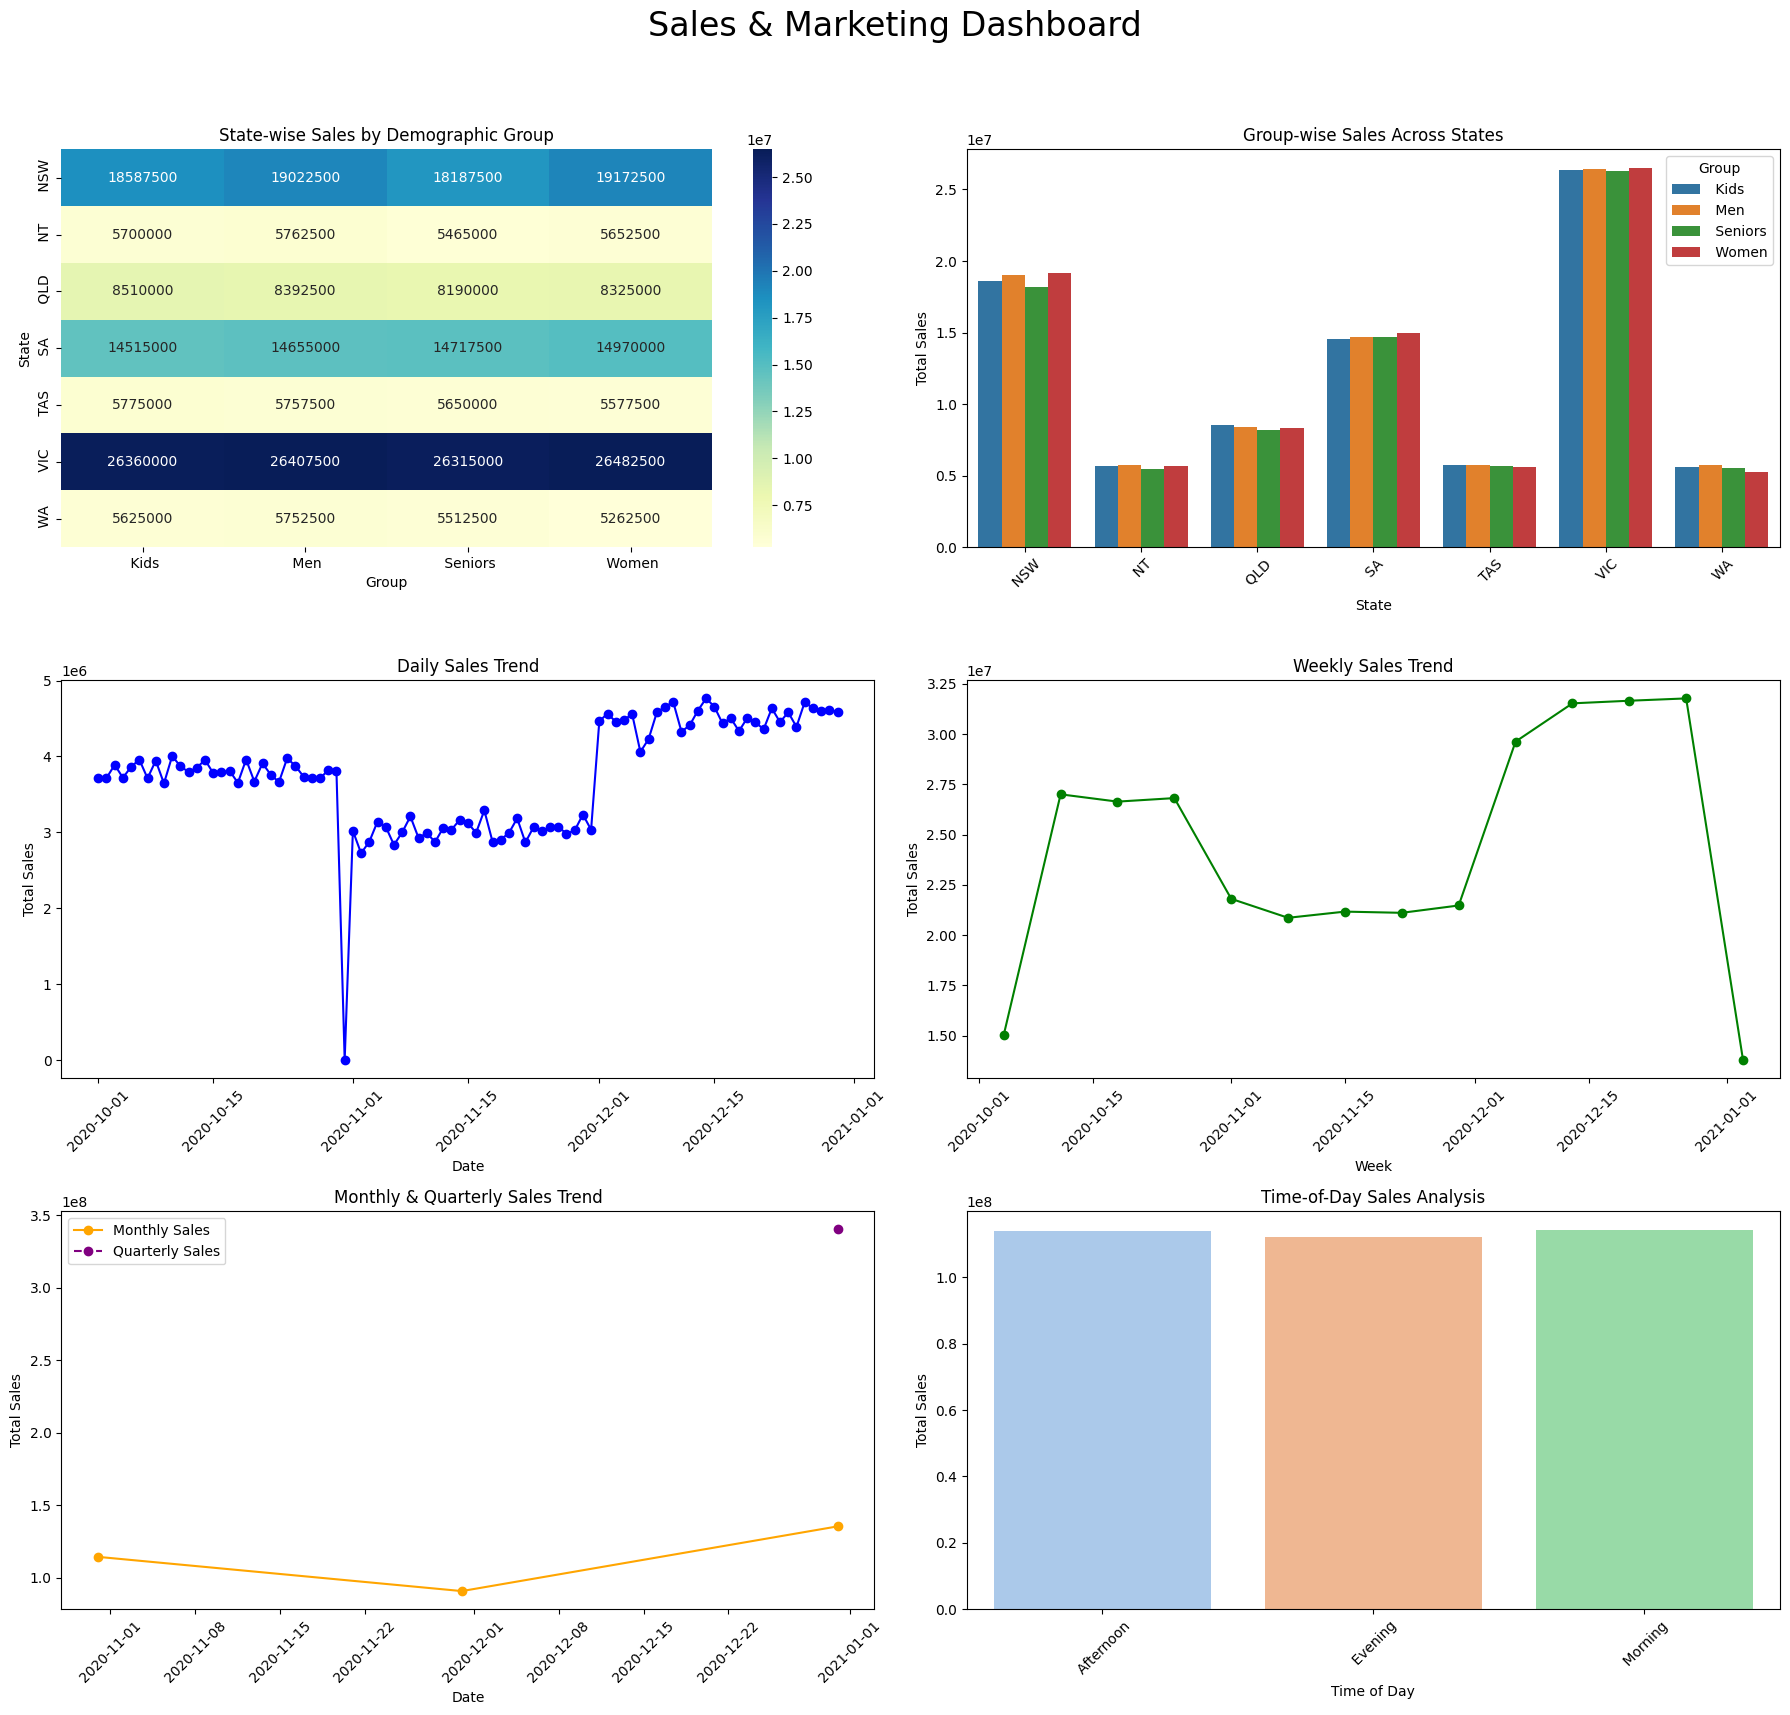

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Loading and Preprocessing

# To Load the dataset
df = pd.read_excel("sales_dataset.xlsx")

# To Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


# 2. Data Aggregation for Dashboard Components


# 2.1 State-wise Sales Analysis by Demographic Group:
# Aggregate sales by State and Group (demographic)
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
# Pivot the data for a heatmap (rows: States, columns: Groups)
state_group_pivot = state_group_sales.pivot(index='State', columns='Group', values='Sales')

# 2.2 Group-wise Sales Analysis Across States:
# (We use the same aggregated data as above for a grouped bar plot.)

# 2.3 Time Series Aggregation:
# For resampling, we use the Date column directly.
daily_sales = df.resample('D', on='Date')['Sales'].sum()
weekly_sales = df.resample('W', on='Date')['Sales'].sum()
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
quarterly_sales = df.resample('QE', on='Date')['Sales'].sum()

# 2.4 Time-of-Day Analysis:
# Group the data by the 'Time' column to sum sales
time_sales = df.groupby('Time')['Sales'].sum().reset_index()

# -------------------------
# 3. Constructing the Dashboard
# -------------------------
# Create a dashboard with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Sales & Marketing Dashboard', fontsize=24)

# --- Plot 1: State-wise Sales by Demographic Group
sns.heatmap(state_group_pivot, annot=True, fmt=".0f", cmap="YlGnBu", ax=axs[0,0])
axs[0,0].set_title('State-wise Sales by Demographic Group')
axs[0,0].set_ylabel('State')
axs[0,0].set_xlabel('Group')

# --- Plot 2: Group-wise Sales Across States (Grouped Bar Plot)
sns.barplot(data=state_group_sales, x='State', y='Sales', hue='Group', ax=axs[0,1])
axs[0,1].set_title('Group-wise Sales Across States')
axs[0,1].set_xlabel('State')
axs[0,1].set_ylabel('Total Sales')
axs[0,1].tick_params(axis='x', rotation=45)

# --- Plot 3: Daily Sales Trend (Line Chart)
axs[1,0].plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='blue')
axs[1,0].set_title('Daily Sales Trend')
axs[1,0].set_xlabel('Date')
axs[1,0].set_ylabel('Total Sales')
axs[1,0].tick_params(axis='x', rotation=45)

# --- Plot 4: Weekly Sales Trend (Line Chart) ---
axs[1,1].plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-', color='green')
axs[1,1].set_title('Weekly Sales Trend')
axs[1,1].set_xlabel('Week')
axs[1,1].set_ylabel('Total Sales')
axs[1,1].tick_params(axis='x', rotation=45)

# --- Plot 5: Monthly & Quarterly Sales Trend ---
# Combining monthly and quarterly trends on one subplot
axs[2,0].plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', label='Monthly Sales', color='orange')
axs[2,0].plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='--', label='Quarterly Sales', color='purple')
axs[2,0].set_title('Monthly & Quarterly Sales Trend')
axs[2,0].set_xlabel('Date')
axs[2,0].set_ylabel('Total Sales')
axs[2,0].tick_params(axis='x', rotation=45)
axs[2,0].legend()

# --- Plot 6: Time-of-Day Sales Analysis (Bar Chart) ---
sns.barplot(data=time_sales, x='Time', y='Sales', palette='pastel', ax=axs[2,1])
axs[2,1].set_title('Time-of-Day Sales Analysis')
axs[2,1].set_xlabel('Time of Day')
axs[2,1].set_ylabel('Total Sales')
axs[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# State-wise Analysis:
# The heatmap (Plot 1) quickly shows which states perform best for each demographic group, to identify regional opportunities or issues.

# Group-wise Analysis Across States:
# The grouped bar chart (Plot 2) allows side-by-side comparisons of sales across states for Kids, Women, Men, and Seniors.

# Time Series Trends:
# Daily and weekly trends (Plots 3 & 4) offer granular insights, while the combined monthly and quarterly trends (Plot 5) reveal longer-term patterns.

# Time-of-Day Insights:
# The time-of-day analysis (Plot 6) show peak periods, assisting with targeted marketing, hyper-personalization, and the design of Next Best Offers.